# Генерация датасета с признаками и целевыми переменным

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np

Генерируем синтетический датасет пользователей с необходимыми признаками для задачи

In [3]:

np.random.seed(42)  # задаём фиксированное начальное значение

# Количество пользователей
n = 2000

# Генерация признаков
age = np.random.randint(18, 70, size=n)  # возраст от 18 до 70
income = np.random.randint(20000, 150000, size=n)  # доход
purchases = np.random.randint(1, 200, size=n)  # количество покупок
time_on_site = np.random.uniform(5, 60, size=n)  # время на сайте в минутах

# Генерация целевой переменной для регрессии
# Например, сумма покупок зависит от дохода и покупок
purchase_amount = 0.5 * income + 2 * purchases + np.random.normal(0, 10, size=n)

# Генерация целевой переменной для классификации
# Например, активность определяется по условию суммы покупок
activity = (purchase_amount > np.median(purchase_amount)).astype(int)

# Формирование DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Purchases_cnt': purchases,
    'Time_on_site': time_on_site,
    'Purchase_amount': purchase_amount,
    'is_active': activity
})


Посмотрим на наш получившийся датасет

In [4]:
df.head()

,Age,Income,Purchases_cnt,Time_on_site,Purchase_amount,is_active
0,56,81788,35,21.832830,40970.046841,0
1,69,102879,65,35.353243,51566.501865,1
2,46,58827,8,48.417518,29419.834766,0
3,32,127188,45,27.891993,63704.229233,1
4,60,25655,87,14.246497,13001.494437,0


# Модель линейной регрессии

## Задача

__Предсказание суммы покупок__   
*   *Целевая переменная* - Сумма покупок (Purchase_amount)     
*   *Признаки* - возраст (Age), доход (Income), количество покупок (Purchases_cnt), время на сайте (Time_on_site)

## Ход выполнения

Импортируем необходимые библиотеки

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Разделяем признаки (X) и целевую переменную (y)

In [6]:
X = df[['Age', 'Income', 'Purchases_cnt', 'Time_on_site']]
y = df['Purchase_amount']

Разбиваем данные на обучающую и тестовую выборки (80/20) с помощью функции `train_test_split`

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Создаем модель линейной регрессии

In [8]:
model = LinearRegression()

Обучаем модель на тренировочной выборке, где вычисляются оптимальные коэффициенты для признаков

In [9]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Используем обученную модель для предсказания суммы покупок на тестовых данных

In [10]:
y_pred = model.predict(X_test)

Посмотрим на коэффициенты регрессии, они показывают, насколько сильно и в каком направлении каждый признак влияет на сумму покупок

In [11]:
print("Коэффициенты модели (влияние признаков):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Коэффициенты модели (влияние признаков):
Age: 0.01
Income: 0.50
Purchases_cnt: 1.99
Time_on_site: 0.02


Посмотри на свободный член

In [12]:
print(f"Свободный член (intercept): {model.intercept_:.2f}")

Свободный член (intercept): 1.16


Создем датасет с новыми пользователями и их признаками

In [13]:
# Создание данных в виде словаря
data = {
    'User': [1, 2, 3, 4, 5],
    'Age': [25, 40, 22, 35, 28],
    'Income': [50000, 85000, 37000, 60000, 45450],
    'Purchases_cnt': [50, 17, 23, 3, 48],
    'Time_on_site': [30, 45, 12, 25, 20]
}

# Создание DataFrame из словаря
df_users = pd.DataFrame(data)

Делаем прогноз для каждого пользователя

In [14]:
predicted_purchase = model.predict(df_users[['Age', 'Income', 'Purchases_cnt', 'Time_on_site']])
for user, purchase in zip(df_users['User'], predicted_purchase):
    print(f"Прогнозируемая сумма покупок для пользователя {user}: {round(purchase, 2)} руб.")

Прогнозируемая сумма покупок для пользователя 1: 25100.61 руб.
Прогнозируемая сумма покупок для пользователя 2: 42534.49 руб.
Прогнозируемая сумма покупок для пользователя 3: 18546.68 руб.
Прогнозируемая сумма покупок для пользователя 4: 30006.66 руб.
Прогнозируемая сумма покупок для пользователя 5: 22821.55 руб.


Таким образом, модель позволяет, имея значения признаков новых пользователей, предсказать их ожидаемую сумму покупок.

## Оценка точности модели линейной регрессии на тестовой выборке (MAE, R2)

Импортируем необходимые библиотеки

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Делаем предсказание модели на тестовых данных

In [16]:
y_pred = model.predict(X_test)

Расчитываем метрики

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Выводим результат

In [18]:
print(f"MAE (средняя абсолютная ошибка): {mae:.2f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.2f}")
print(f"R2 (коэффициент детерминации): {r2:.2f}")

MAE (средняя абсолютная ошибка): 7.94
MSE (среднеквадратичная ошибка): 96.54
R2 (коэффициент детерминации): 1.00


## Выводы об оценке точности модели линейной регрессии

Модель линейной регрессии работает очень хорошо на данном синтетическом датасете, демонстрируя отличную способность прогнозировать сумму покупок.
*   __MAE = 7.94__ означает, что в среднем прогноз модели отличается от реальных значений примерно на 7.94 тыс. рублей по сумме покупок.   
*   Значение __MSE = 96.54__ указывает на вариативность ошибок и присутствие больших ошибок более сильно, чем MAE. 
*   Высокий __R2 = 1.0__ подтверждает, что признаки хорошо объясняют целевую переменную *(R2 близкий к 1 крайне редко встречается в реальной жизни, возможно, это связано с тем, что модель обучена и проверена на синтетических данных без избыточного шума)*.

## Визуализация качества модели линейной регрессии

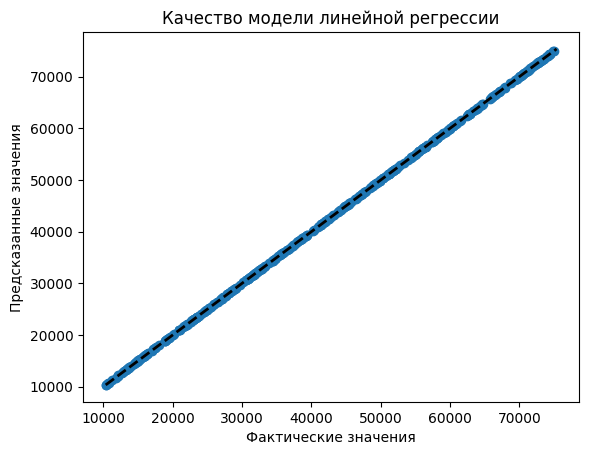

In [19]:
# Визуализация
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Качество модели линейной регрессии")
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

На данном графике видно, что модель делает точные прогнозы — для каждого объекта предсказанное число равно реальному.    
Такое расположение указывает на идеальную подгонку модели к данным, что выражается коэффициентом детерминации R2=1. Это связано с тем, что модель обучена на синтетических данных и в них отстутствует избыточный шум.

## Визуализация зависимости целевой переменной от признаков

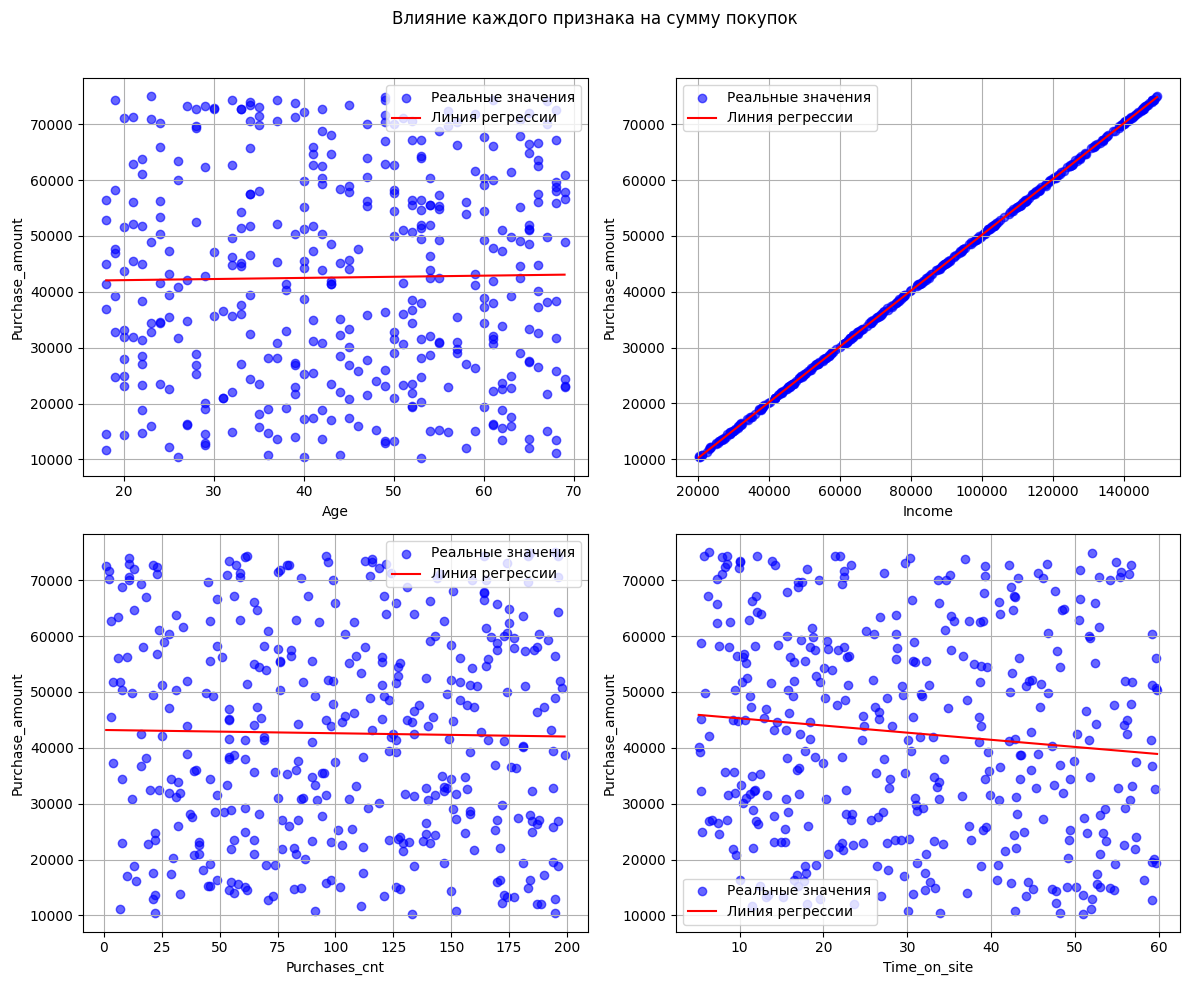

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


features = ['Age', 'Income', 'Purchases_cnt', 'Time_on_site']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    X_feat = X_test[[feature]].values  # Признак i
    y_true = y_test.values
    model_feat = LinearRegression()
    model_feat.fit(X_feat, y_true)
    y_pred = model_feat.predict(X_feat)
    
    # Сортируем для красивой линии
    sorted_idx = np.argsort(X_feat.flatten())
    
    ax.scatter(X_feat, y_true, color='blue', alpha=0.6, label='Реальные значения')
    ax.plot(X_feat[sorted_idx], y_pred[sorted_idx], color='red', label='Линия регрессии')
    ax.set_xlabel(feature)
    ax.set_ylabel('Purchase_amount')
    ax.legend()
    ax.grid(True)

plt.suptitle('Влияние каждого признака на сумму покупок')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Вывод о влиянии признаков на целевую переменную

  
По представленным графикам можно сделать следующие выводы:
Каждый график показывает зависимость суммы покупок (Purchase_amount) от одного из признаков: Age, Income, Purchases_cnt и Time_on_site, с нанесённой линией линейной регрессии.
Линия регрессии отражает тренд влияния признака на сумму покупок.
*   На графиках зависимости Purchase_amount от Age, Income и Time_on_site видно, что признаки слабо коррелируют с целевой переменной. Это значит, что эти признаки менее значимы для модели, и ее предсказания по ним будут менее точными.
*   На графике зависимости Purchase_amount от Purchases_cnt видно, что точки плотно лежат и образуют прямую линию с положительным наклоном. Это свидетельствует о сильной линейной зависимости — увеличение количества покупок характеризует рост суммы покупок. Этот признак действительно является важным и значимым для модели.

# Метод k-ближайших соседей (kNN)

## Задача

__Отнести объект к одному из классов (активный/неактивный) по признакам__    
*   *Целевая переменная* - активность пользователя (is_active)    
*   *Признаки* - возраст (Age), доход (Income), количество покупок (Purchases_cnt), время на сайте (Time_on_site)

## Ход выполнения

Импортируем необходимые библиотеки

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Проверим наш датасет

In [22]:
df.head()

,Age,Income,Purchases_cnt,Time_on_site,Purchase_amount,is_active
0,56,81788,35,21.832830,40970.046841,0
1,69,102879,65,35.353243,51566.501865,1
2,46,58827,8,48.417518,29419.834766,0
3,32,127188,45,27.891993,63704.229233,1
4,60,25655,87,14.246497,13001.494437,0


Разделяем признаки (X) и целевую переменную (y)

In [23]:
X = df[['Age', 'Income', 'Purchases_cnt', 'Time_on_site']]
y = df['is_active']

Разбиваем данные на обучающую и тестовую выборки (80/20) с помощью функции `train_test_split`

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируем признаки на тренировочной и тестовой выборке 

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Выбираем оптимальное K.    
Осуществляем перебор значений из диапазона от 1 до 20. А затем используем кросс-валидацию для оценки модели на разных значениях и выбираем оптимальное.

In [26]:
k_values = range(1, 21)
best_score = 0
best_k = 1
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k

print(f'Оптимальное значение K: {best_k}')

Оптимальное значение K: 20


Создаем объект модели с полученым K

In [27]:
knn = KNeighborsClassifier(n_neighbors=best_k)

Обучаем модель на тренировочных данных

In [28]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Используем обученную модель для предсказания активности пользователей на тестовых данных

In [29]:
y_pred = knn.predict(X_test_scaled)

Оцениваем точность модели

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.985


## Матрица ошибок (confusion matrix) для оценки качества классификации

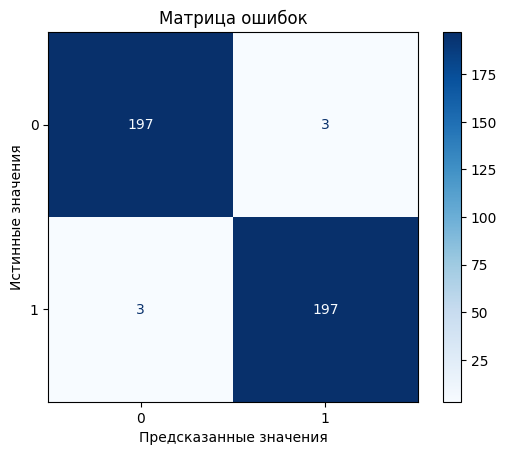

In [31]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.title('Матрица ошибок')
plt.show()

## Выводы

1. Модель классифицирует пользователей очень точно — всего 6 ошибок на 400 тестовых примеров.

2. Хороший баланс между классами по ошибкам — модель не склонна к систематическому пропуску или избыточному срабатыванию.

3. Высокое качество классификации (примерно 98.5% правильных предсказаний) говорит, что признаки хорошо разделяют классы.

Таким образом, модель KNN работает очень эффективно и сбалансированно, с минимальными ошибками обоих типов.